In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import warnings  # Allows you to control warning messages (like suppressing them).
warnings.filterwarnings('ignore')  # This line disables warning messages that can clutter the output.

In [3]:
resume = pd.read_csv(r"E:\Master's\Sem3\PROJECT\ML project\resume_dataset.csv")
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [4]:
resume.shape

(169, 2)

In [5]:
len(resume['Category'].unique())

25

In [6]:
resume['Category'].value_counts()

Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
Automation Testing            7
DevOps Engineer               7
Testing                       7
DotNet Developer              7
Hadoop                        7
SAP Developer                 6
Python Developer              6
Health and fitness            6
Civil Engineer                6
Arts                          6
Business Analyst              6
Web Designing                 5
Mechanical Engineer           5
Sales                         5
ETL Developer                 5
Electrical Engineering        5
Blockchain                    5
Network Security Engineer     5
Operations Manager            4
PMO                           3
Name: count, dtype: int64

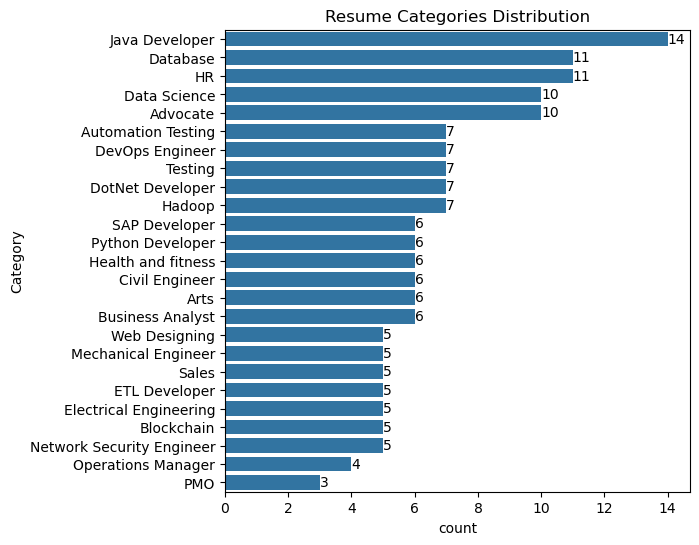

In [7]:
plt.figure(figsize=(6,6))
ax = sns.countplot(y='Category',data=resume,order= resume['Category'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Resume Categories Distribution')
plt.show()

## Cleaning and Tokenization

In [8]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    #resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    import string
    resumeText = re.sub(f"[{re.escape(string.punctuation)}]", " ", resumeText) # instead of typing the whole punchuations manually
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)  # Removes non-ASCII characters (like emojis, accented letters).
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))

In [9]:
resume

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
165,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")

def clean_resume_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc 
              if not token.is_stop and not token.is_punct and not token.like_num]
    return " ".join(tokens)

resume['cleaned_resume'] = resume['cleaned_resume'].apply(clean_resume_spacy)


In [11]:
resume

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python panda nump...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,education detail b e uit rgpvdata ScientistDat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest Deep Learning Control System Des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",education detail MCA YMCAUST Faridabad Haryana...
...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient MS office Word Basi...
165,Testing,â Willingness to accept the challenges. â ...,Willingness ept challenge Positive think goo...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS quick learner Eagerness learn ...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills SOFTWARE KNOWLEDGE MS Power Po...


In [15]:
# Convert text into numerical form so ML models can understand it.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X = tfidf.fit_transform(resume['cleaned_resume']).toarray()   # numerical resume

In [16]:
# Convert resume categories into numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(resume['Category'])  # numerical Categories

In [17]:
# Train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lor_accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:",lor_accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.67      0.67      0.67         3
           7       0.67      1.00      0.80         2
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.33      1.00      0.50         3
          13       1.00      0.67      0.80         3
          14       0.00      0.00      0.00         3
          15       0.11      1.00      0.20         3
          16       0.00      0.00      0.00         

### Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mnb_accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", mnb_accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.19607843137254902
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.33      0.50         3
           7       0.67      1.00      0.80         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       1.00      0.33      0.50         3
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.07      1.00      0.13         3
          16       0.00      0.00      0.00        

### LinearSVC

In [42]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
y_lsvc_pred = model.predict(X_test)

lsvc_accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", lsvc_accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.45098039215686275
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
           5       0.50      0.25      0.33         4
           6       0.50      1.00      0.67         3
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         2
           9       0.33      0.50      0.40         2
          10       0.00      0.00      0.00         1
          11       1.00      0.50      0.67         2
          12       0.67      0.67      0.67         3
          13       0.50      0.33      0.40         3
          14       0.50      0.33      0.40         3
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00        

### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6274509803921569
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.17      1.00      0.29         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         4
           6       0.67      0.67      0.67         3
           7       0.67      1.00      0.80         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       0.50      0.50      0.50         2
          12       0.50      1.00      0.67         3
          13       1.00      1.00      1.00         3
          14       1.00      0.33      0.50         3
          15       0.60      1.00      0.75         3
          16       1.00      1.00      1.00         

### Xgboot Classifier

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax', 
    num_class=len(le.classes_), 
    n_estimators=200, 
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

xg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xg_accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       1.00      0.50      0.67         2
          10       0.50      1.00      0.67         1
          11       0.50      1.00      0.67         2
          12       1.00      1.00      1.00         3
          13       1.00      0.33      0.50         3
          14       0.67      0.67      0.67         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         

### LightGBM

In [28]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    n_estimators=200,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

lgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lgb_accuracy)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 140
[LightGBM] [Info] Start training from score -2.824774
[LightGBM] [Info] Start training from score -3.161247
[LightGBM] [Info] Start training from score -2.978925
[LightGBM] [Info] Start training from score -3.672072
[LightGBM] [Info] Start training from score -3.161247
[LightGBM] [Info] Start training from score -4.077537
[LightGBM] [Info] Start training from score -2.824774
[LightGBM] [Info] Start training from score -2.573460
[LightGBM] [Info] Start training from score -3.161247
[LightGBM] [Info] Start training from score -3.161247
[LightGBM] [Info] Start training from score -3.384390
[LightGBM] [Info] Start training from score -3.672072


In [30]:
# Creating a DataFrame to compare all model performances
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Linear SVC", "Random Forest", "XGBoost", "LightGBM"],
    "Accuracy":[lor_accuracy, mnb_accuracy, lsvc_accuracy, rf_accuracy, xg_accuracy, lgb_accuracy]
})

# Set 'Model' column as index
comparison_df.set_index("Model", inplace=True)

# Sort based on R2 Score values (descending order)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False)

# Display sorted DataFrame
comparison_df

,Accuracy
Model,
Linear SVC,0.843137
XGBoost,0.705882
Random Forest,0.627451
LightGBM,0.450980
Logistic Regression,0.333333
Multinomial Naive Bayes,0.196078


## Confusion Matrix for Linear SVC

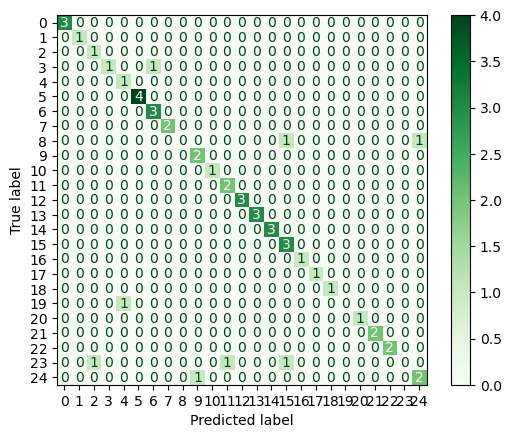

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_lsvc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Greens)
plt.show()

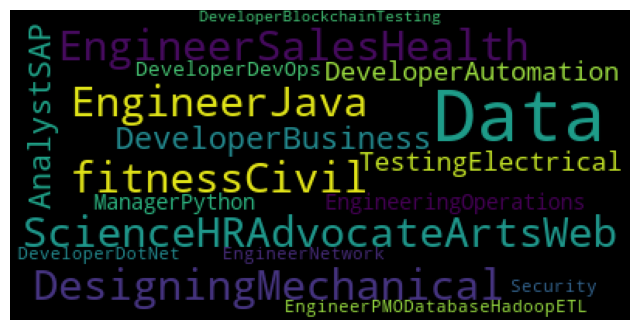

In [40]:
from wordcloud import WordCloud

text="".join(resume['Category'].unique())
wordcloud= WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()